In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from mplhep import *
linestyle_str = [
('solid', 'solid'), # Same as (0, ()) or '-'
('dotted', '.'),# Same as (0, (1, 1)) or '.'
('dashed', '--'),   # Same as '--'
('dashdot', '-.')]  # Same as '-.'
from matplotlib.pyplot import *
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
from  matplotlib import *
mpl.rcParams['figure.figsize'] = (10,6)
import sympy as sy
sy.init_printing()
from sympy import *
%matplotlib inline

In [2]:
gchi, MZp, gqV, gqL, gqR, Me, MMU, MTA, MU, MC, MT, MD, MS, MB, Mchi, Mq, X, gqA, gqV, cw = sy.symbols('gchi MZp gqV gqL gqR ME MMU Mta Mu Mc Mt Md MS Mb Mchi Mq X gqA gqV cw', real=True)
gZp = 1 
gsd = -2*gchi
#xev = MZp/(2*gchi)
ychi = 1.5
MU = 0.00255
MC = 1.27
MT = 172
MD = 0.00504
MS = 0.101
MB = 4.7
Mchi= 65
gchi = 1
gqA = 0
MZp_list = list(range(360, 3500, 200))
gqV_list = [0.1]
#MZp_list


In [3]:
def BRZp(MZp__list, gqV__list):
    BRqq= []
    BRXdXd = []
    Zpqq_values = []
    ZpXdXd_values = []
    ZptotalW_values = []
    gqL = (gqV + gqA)
    gqR = (gqV - gqA)
    Zpbb = simplify(simplify((MZp**2*(6*gqL**2*gZp**2*MZp**2 + 6*gqR**2*gZp**2*MZp**2))/(48*sy.pi*abs(MZp)**3)
                        ).subs(MB**2, X *MZp**2)).subs(X, MB**2 /MZp**2)
    Zpcc =simplify(simplify( (MZp**2*(6*gqL**2*gZp**2*MZp**2 + 6*gqR**2*gZp**2*MZp**2))/(48*sy.pi*abs(MZp)**3)
                             ).subs(MC**2, X *MZp**2)).subs(X, MC**2 /MZp**2)
    Zpdd = simplify(simplify( (MZp**2*(6*gqL**2*gZp**2*MZp**2 + 6*gqR**2*gZp**2*MZp**2))/(48*sy.pi*abs(MZp)**3)
                        ).subs(MD**2, X *MZp**2)).subs(X, MD**2 /MZp**2)
    Zpss = simplify(simplify( (MZp**2*(6*gqL**2*gZp**2*MZp**2 + 6*gqR**2*gZp**2*MZp**2))/(48*sy.pi*abs(MZp)**3)
                        ).subs(MS**2, X *MZp**2)).subs(X, MS**2 /MZp**2)
    
    Zptt = sy.Piecewise(
        (0, MZp < 2 * MT),
        (simplify(simplify( ((-6*gqL**2*gZp**2*MT**2 + 36*gqL*gqR*gZp**2*MT**2 - 6*gqR**2*gZp**2*MT**2 + 6*gqL**2*gZp**2*MZp**2 + 6*gqR**2*gZp**2*MZp**2)*sy.sqrt(-4*MT**2*MZp**2 + MZp**4))/(48*sy.pi*abs(MZp)**3)
                    ).subs(MT**2, X * MZp**2)).subs(X, MT**2 / MZp**2), True))
    
    Zpuu = simplify(simplify(  (MZp**2*(6*gqL**2*gZp**2*MZp**2 + 6*gqR**2*gZp**2*MZp**2))/(48*sy.pi*abs(MZp)**3)
                              ).subs(MU**2, X *MZp**2)).subs(X, MU**2 /MZp**2)
    ZpXdXd = simplify(simplify( ((-16*gchi**2*Mchi**2 + 4*gchi**2*MZp**2)*sy.sqrt(-4*Mchi**2*MZp**2 + MZp**4))/(96*sy.pi*(MZp)**3)
                        ).subs(Mchi**2, X *MZp**2)).subs(X, Mchi**2 /MZp**2)
    Zpqq = Zpbb + Zpcc + Zpdd + Zpss + Zptt + Zpuu
    ZptotalW = Zpbb + Zpcc + Zpdd + Zpss + Zptt + Zpuu + ZpXdXd   
    
    for MZp_value in MZp_list:
        for gqV_value in gqV_list:
            Zpqq_value = Zpqq.subs({MZp: MZp_value, gqV: gqV_value}).evalf()
            ZptotalW_value = ZptotalW.subs({MZp: MZp_value, gqV: gqV_value}).evalf()
            ZpXdXd_value = ZpXdXd.subs({MZp: MZp_value}).evalf()
            Zpqq_values.append(Zpqq_value)
            ZptotalW_values.append(ZptotalW_value)
            ZpXdXd_values.append(ZpXdXd_value)
            BRqq.append((Zpqq_value / ZptotalW_value).evalf())
            BRXdXd.append((ZpXdXd_value / ZptotalW_value).evalf())
    return BRqq, BRXdXd, Zpqq_values, ZptotalW_values, ZpXdXd_values
BRqq_list, BRXdXd_list, Zpqq_list, ZptotalW_list, ZpXdXd_list = BRZp(MZp, gqV)
#BRqq_list
#Zpqq_list
#ZptotalW_list
#ZpXdXd_list
BRXdXd_list


In [4]:
gqV_list = [0.25]
BRqq_list2, BRXdXd_list2, Zpqq_list2, ZptotalW_list2, ZpXdXd_list2 = BRZp(MZp, gqV)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


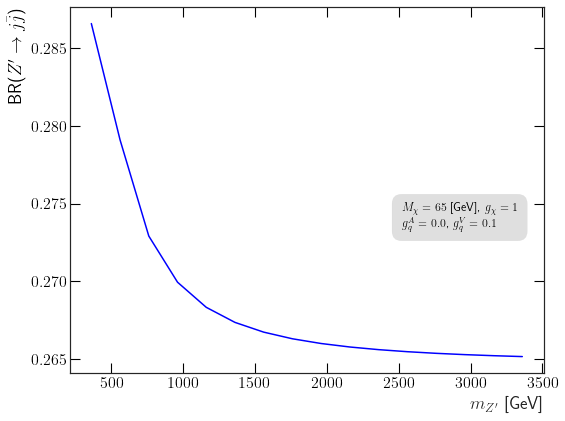

In [10]:
import seaborn as sns
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(MZp_list, BRqq_list, color='blue', linestyle='solid')
#plt.plot(MZp_list, BRqq_list2, label=r'$g_{q}^{V} = $ 0.25', color='magenta', linestyle='solid')
#plt.plot(MZp_list, BRqq_list3, label=r'$g_{q}^{V} = 0.23$', color='yellowgreen', linestyle='solid')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]',size=18,  labelpad=5, loc="right")
plt.ylabel(r'BR($Z^{\prime} \rightarrow j\bar{j}$)',size=18, color='black',labelpad=5, loc="top")
ax.tick_params(axis='x', labelcolor='black', labelsize=14)
ax.tick_params(axis='y', labelcolor='black', labelsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
if not os.path.exists('plots/BRZp'):
    os.makedirs('plots/BRZp')
important_info = (r"$M_{\chi} = 65$ [GeV], $g_{\chi} = 1$",
                  r"$g_q^A = 0.0$, $g_q^V = 0.1$")
#                  r"$S_a = 0.01$")
multiline_info = "\n".join(important_info)   
plt.tight_layout()
ax.text(0.7, 0.4,  
        multiline_info,
        transform=ax.transAxes,
        fontsize=12,  
        color='black',
        #fontweight='bold',
        bbox=dict(
            facecolor='silver',
            alpha=0.5,
            edgecolor='silver',
            boxstyle='round,pad=0.8',
            linewidth=0.2
        ))    
#plt.yscale('log')
#plt.ylim(0.26, 0.29) 
ax.tick_params(direction='in', length=10, width=1.1, colors='black', which='major', top=True, right=True)
ax.tick_params(direction='in', length=5, width=0.6, colors='black', which='minor', top=True, right=True)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_linewidth(1.2)
sns.despine(left=False, bottom=False, right=False, top=False, offset=None, trim=False)
#plt.grid(False, which='both', linestyle='--', linewidth=0.5)
legend = plt.legend(loc='upper right', fontsize=14)
legend.get_frame().set_alpha(0.0)
plt.savefig('plots/BRZp/BRZp_qq.pdf', bbox_inches='tight')
plt.show()


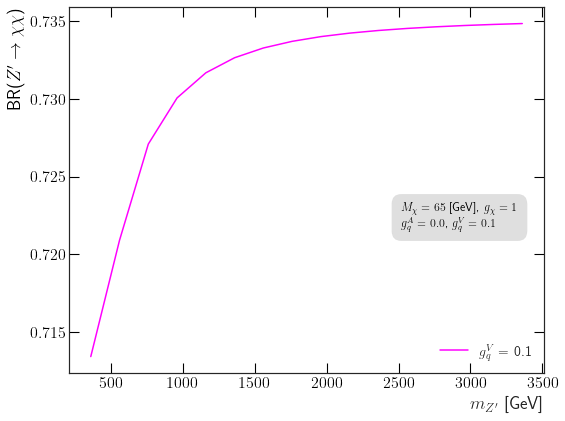

In [9]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(MZp_list, BRXdXd_list, label=r'$g_{q}^{V} = $ 0.1 ', color='magenta', linestyle='solid')
#plt.plot(MZp_list, BRXdXd_list2, label=r'$g_{q}^{V} = $ 0.25 ', color='blue', linestyle='solid')
#plt.plot(MZp_list, BRXdXd_list3, label=r'$g_{q}^{V} = $ 0.23', color='yellowgreen', linestyle='solid')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]',size=18,  labelpad=5, loc="right")
plt.ylabel(r'BR($Z^{\prime} \rightarrow \chi \chi$)', size=18, color='black',labelpad=5, loc="top")
ax.tick_params(axis='x', labelcolor='black', labelsize=14)
ax.tick_params(axis='y', labelcolor='black', labelsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
important_info = (r"$M_{\chi} = 65$ [GeV], $g_{\chi} = 1$",
                  r"$g_q^A = 0.0$, $g_q^V = 0.1$")
#                  r"$S_a = 0.01$")
multiline_info = "\n".join(important_info)   
plt.tight_layout()
ax.text(0.7, 0.4,  
        multiline_info,
        transform=ax.transAxes,
        fontsize=12,  
        color='black',
        #fontweight='bold',
        bbox=dict(
            facecolor='silver',
            alpha=0.5,
            edgecolor='silver',
            boxstyle='round,pad=0.8',
            linewidth=0.2
        ))    
#plt.yscale('log')
#plt.ylim(0.71, 0.74)  
ax.tick_params(direction='in', length=10, width=1.1, colors='black', which='major', top=True, right=True)
ax.tick_params(direction='in', length=5, width=0.6, colors='black', which='minor', top=True, right=True)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_linewidth(1.2)
sns.despine(left=False, bottom=False, right=False, top=False, offset=None, trim=False)
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
legend = plt.legend(loc='lower right', fontsize=14)
legend.get_frame().set_alpha(0.0)
plt.savefig('plots/BRZp/BRZp_chichi.pdf', bbox_inches='tight')
plt.show()

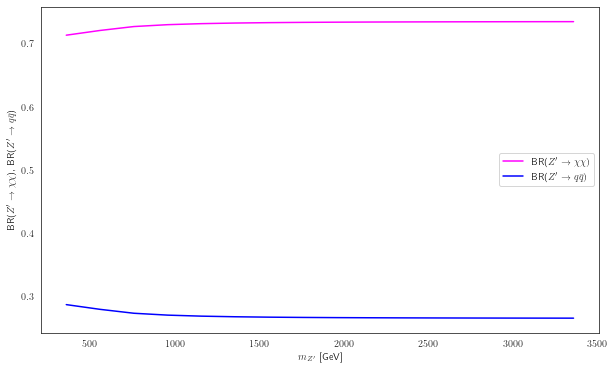

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(MZp_list, BRXdXd_list, label=r'BR($Z^{\prime} \rightarrow \chi \chi)$', color='magenta', linestyle='solid')
plt.plot(MZp_list, BRqq_list, label=r'BR($Z^{\prime} \rightarrow q\bar{q})$', color='blue', linestyle='solid')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'BR($Z^{\prime} \rightarrow \chi \chi$), BR($Z^{\prime} \rightarrow q\bar{q}$)')
plt.yscale('linear')
plt.legend()
plt.show()